In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
x = np.array([0, 0.1, 2, 4])
f = np.array([4, 0.9, 3.6, 5])

prior Distribution over functions

In [ ]:
n =100
x_prior = np.linspace(-2, 7, n)
def Kernel(x):
    return np.exp(-np.array([(x-xi)**2 for xi in x]))

In [ ]:
K_prior = Kernel(x_prior)
mu_prior = np.zeros_like(x_prior)
f_prior = np.random.multivariate_normal(mu_prior, K_prior,10)

joint ditribution

In [ ]:
x_joint = np.r_[x,x_prior]
K_joint = Kernel(x_joint)

In [ ]:
n = x.size
K = K_joint[:n,:n]
Kx = K_joint[n:,:n]
Kxx = K_joint[n:,n:]

inference

In [ ]:
mu_posterior = Kx@np.linalg.inv(K)@f
K_posterior = Kxx - Kx@np.linalg.inv(K)@Kx.T
f_posterior = np.random.multivariate_normal(mu_posterior, K_posterior,10)

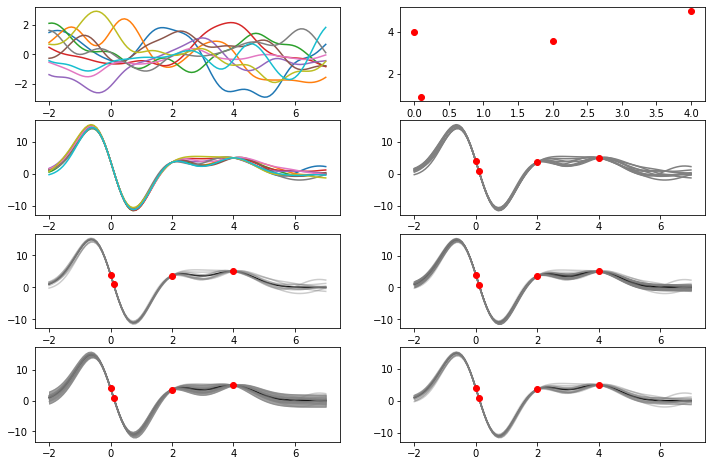

In [ ]:
_,ax = plt.subplots(4,2, figsize=(12,8))
ax[0,0].plot(x_prior, f_prior.T)
ax[0,1].scatter(x,f, color='r')
ax[1,0].plot(x_prior, f_posterior.T)

ax[1,1].plot(x_prior, f_posterior.T, color='grey')
ax[1,1].scatter(x,f, zorder=3, color='r')

ax[2,0].plot(x_prior, mu_posterior, color='black')
ax[2,0].plot(x_prior, f_posterior.T, color='grey', alpha=0.4)
ax[2,0].scatter(x,f, zorder=3, color='r')

ax[2,1].fill_between(x_prior, mu_posterior+ np.sqrt(np.diag(K_posterior)),
                     mu_posterior - np.sqrt(np.diag(K_posterior)), color='grey')
ax[2,1].plot(x_prior, mu_posterior, color='black')
ax[2,1].plot(x_prior, f_posterior.T, color='grey', alpha=0.4)
ax[2,1].scatter(x,f, zorder=3, color='r')

ax[3,0].fill_between(x_prior, mu_posterior +  np.sqrt(np.diag(K_posterior)),
                     mu_posterior - np.sqrt(np.diag(K_posterior)), color='grey', alpha=0.5)

ax[3,0].fill_between(x_prior, mu_posterior + 2*np.sqrt(np.diag(K_posterior)),
                     mu_posterior - 2*np.sqrt(np.diag(K_posterior)), color='grey', alpha=0.5)

ax[3,0].plot(x_prior, mu_posterior, color='black')
ax[3,0].plot(x_prior, f_posterior.T, color='grey', alpha=0.4)
ax[3,0].scatter(x,f, zorder=3, color='r')

ax[3,1].fill_between(x_prior, mu_posterior +  np.sqrt(np.diag(K_posterior)),
                     mu_posterior - np.sqrt(np.diag(K_posterior)), color='grey', alpha=0.5)

ax[3,0].fill_between(x_prior, mu_posterior + 2*np.sqrt(np.diag(K_posterior)),
                     mu_posterior - 2*np.sqrt(np.diag(K_posterior)), color='grey', alpha=0.5)

ax[3,1].plot(x_prior, mu_posterior, color='black')
ax[3,1].plot(x_prior, f_posterior.T, color='grey', alpha=0.4)
ax[3,1].scatter(x,f, zorder=3, color='r')
plt.show()
